#Importando Bibliotecas

In [13]:
import nltk
import pandas as pd
import os
import numpy as np
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

#Análise da base

In [5]:
data = pd.read_csv('base reclamações.csv',sep =';')
# verificação visual das 5 primeiras linhas
data.tail()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,"faixa etarea,,,,,,,,,,,,,"
42302,Sudeste,SP,B2W COMPANHIA DIGITAL,AMERICANAS.COM/SUBMARINO/SHOPTIME/SOUBARATO,COMÉRCIO VAREJISTA DE OUTROS PRODUTOS NÃO ESPE...,Microcomputador / Produtos de Informática,Não entrega/demora na entrega do produto,"Nao Informada,,,,,,,,,,,,,"
42303,Sudeste,SP,ADIDAS DO BRASIL LTDA,ADIDAS.COM.BR,COMÉRCIO ATACADISTA DE CALÇADOS,Vestuário ( Calçado / Roupa ),Não entrega/demora na entrega do produto,"entre 31 a 40 anos,,,,,,,,,,,,,"
42304,Sudeste,SP,RN COMERCIO VAREJISTA S/A,RICARDOELETRO.COM.BR/INSINUANTE.COM/ELETROSHOP...,COMÉRCIO VAREJISTA ESPECIALIZADO DE ELETRODOMÉ...,"Acessório Para Vestuário ( Bolsa,Cinto,Chapéu,...",Produto entregue diferente do pedido,"entre 21 a 30 anos,,,,,,"
42305,Sudeste,SP,DECOLAR.COM LTDA,AGÊNCIA DECOLAR,AGÊNCIAS DE VIAGENS,Agências e Operadoras de viagens (pacotes turí...,Recusa injustificada em prestar serviço,"Nao Informada,,,,,,,,,,,,,"
42306,Sudeste,SP,ESAB ESCOLA SUPERIOR ABERTA DO BRASIL LTDA,NaN,EDUCAÇÃO SUPERIOR - GRADUAÇÃO E PÓS-GRADUAÇÃO,"Escola ( Pré,1º,2º Graus e Superior )",Serviço não fornecido (entrega/instalação/não ...,"entre 31 a 40 anos,,,,,,,,,,,"


In [6]:
#Verificando o tamanho do dataset
data.shape

(42307, 8)

In [7]:
#verificando as colunas
data.columns

Index(['Regiao ', 'estado', 'empresa', 'subsidiaria  ', 'area ', 'serviço',
       'problema', 'faixa etarea,,,,,,,,,,,,,'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42307 entries, 0 to 42306
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Regiao                     42307 non-null  object
 1   estado                     42305 non-null  object
 2   empresa                    42290 non-null  object
 3   subsidiaria                35766 non-null  object
 4   area                       36954 non-null  object
 5   serviço                    42280 non-null  object
 6   problema                   33360 non-null  object
 7   faixa etarea,,,,,,,,,,,,,  42280 non-null  object
dtypes: object(8)
memory usage: 2.6+ MB


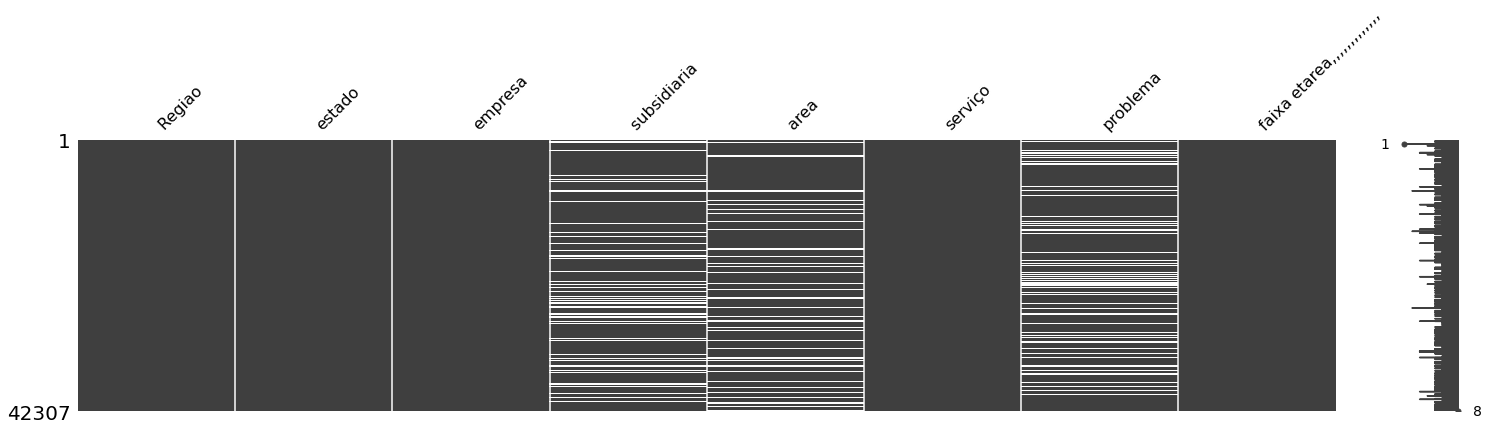

In [16]:
#Verificando as variáveis e não nulos
#Podemos verificar que não temos missing

data.info()
msno.matrix(data, figsize=(25,5));

# Tratamento genérico para qualquer coluna

In [42]:
def TrataDados(coluna):

  # Separação da coluna
  df_coluna = pd.DataFrame()
  df_coluna['coluna'] = data[coluna]

  if int(df_coluna.isnull().sum())>0:
    # Remoção dos "nulls" encontrados
    df_coluna.dropna(inplace=True)
  
  #Substituição de caracteres " " por "_" (espaço) |  "/" por "" | "," por "" | "(" por "" | ")" por "" | "-" por "" | "." por "" | "\t" por "" (tab)
  dicionario = {' ':'_','/':'',',':'','\(':'','\)':'',"-":'','\.':'',r"^\t":''}
  df_coluna["Nome Coluna Sem Espaço"] = df_coluna.replace({'coluna': dicionario},regex=True)

  # Converte o nome das empresas para letras minúsculas
  df_coluna["Nome Coluna Sem Espaço"] = df_coluna["Nome Coluna Sem Espaço"].str.lower()

  # Criação de uma string única com todas as ocorrências dos nomes das empresas
  string_coluna = " ".join([text for text in df_coluna["Nome Coluna Sem Espaço"]])

  return string_coluna


#Word Cloud Genérico

In [45]:
def WordClod(parametro):
  # Geração do wordcloud das 50 empresas mais reclamadas
  wordcloud_empresas = WordCloud(background_color="black",collocations=False,
                              colormap="Oranges_r",
                              width = 3000,
                              height = 2000,
                              max_font_size=1000,
                              max_words=50
                             ).generate(parametro)
  plt.figure(figsize = (40,30),
           facecolor = 'k',
           edgecolor = 'k')
  plt.imshow(wordcloud_empresas, interpolation='bilinear')
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.savefig("Empresa_wordcloud.png")
  plt.show()

#Empresas

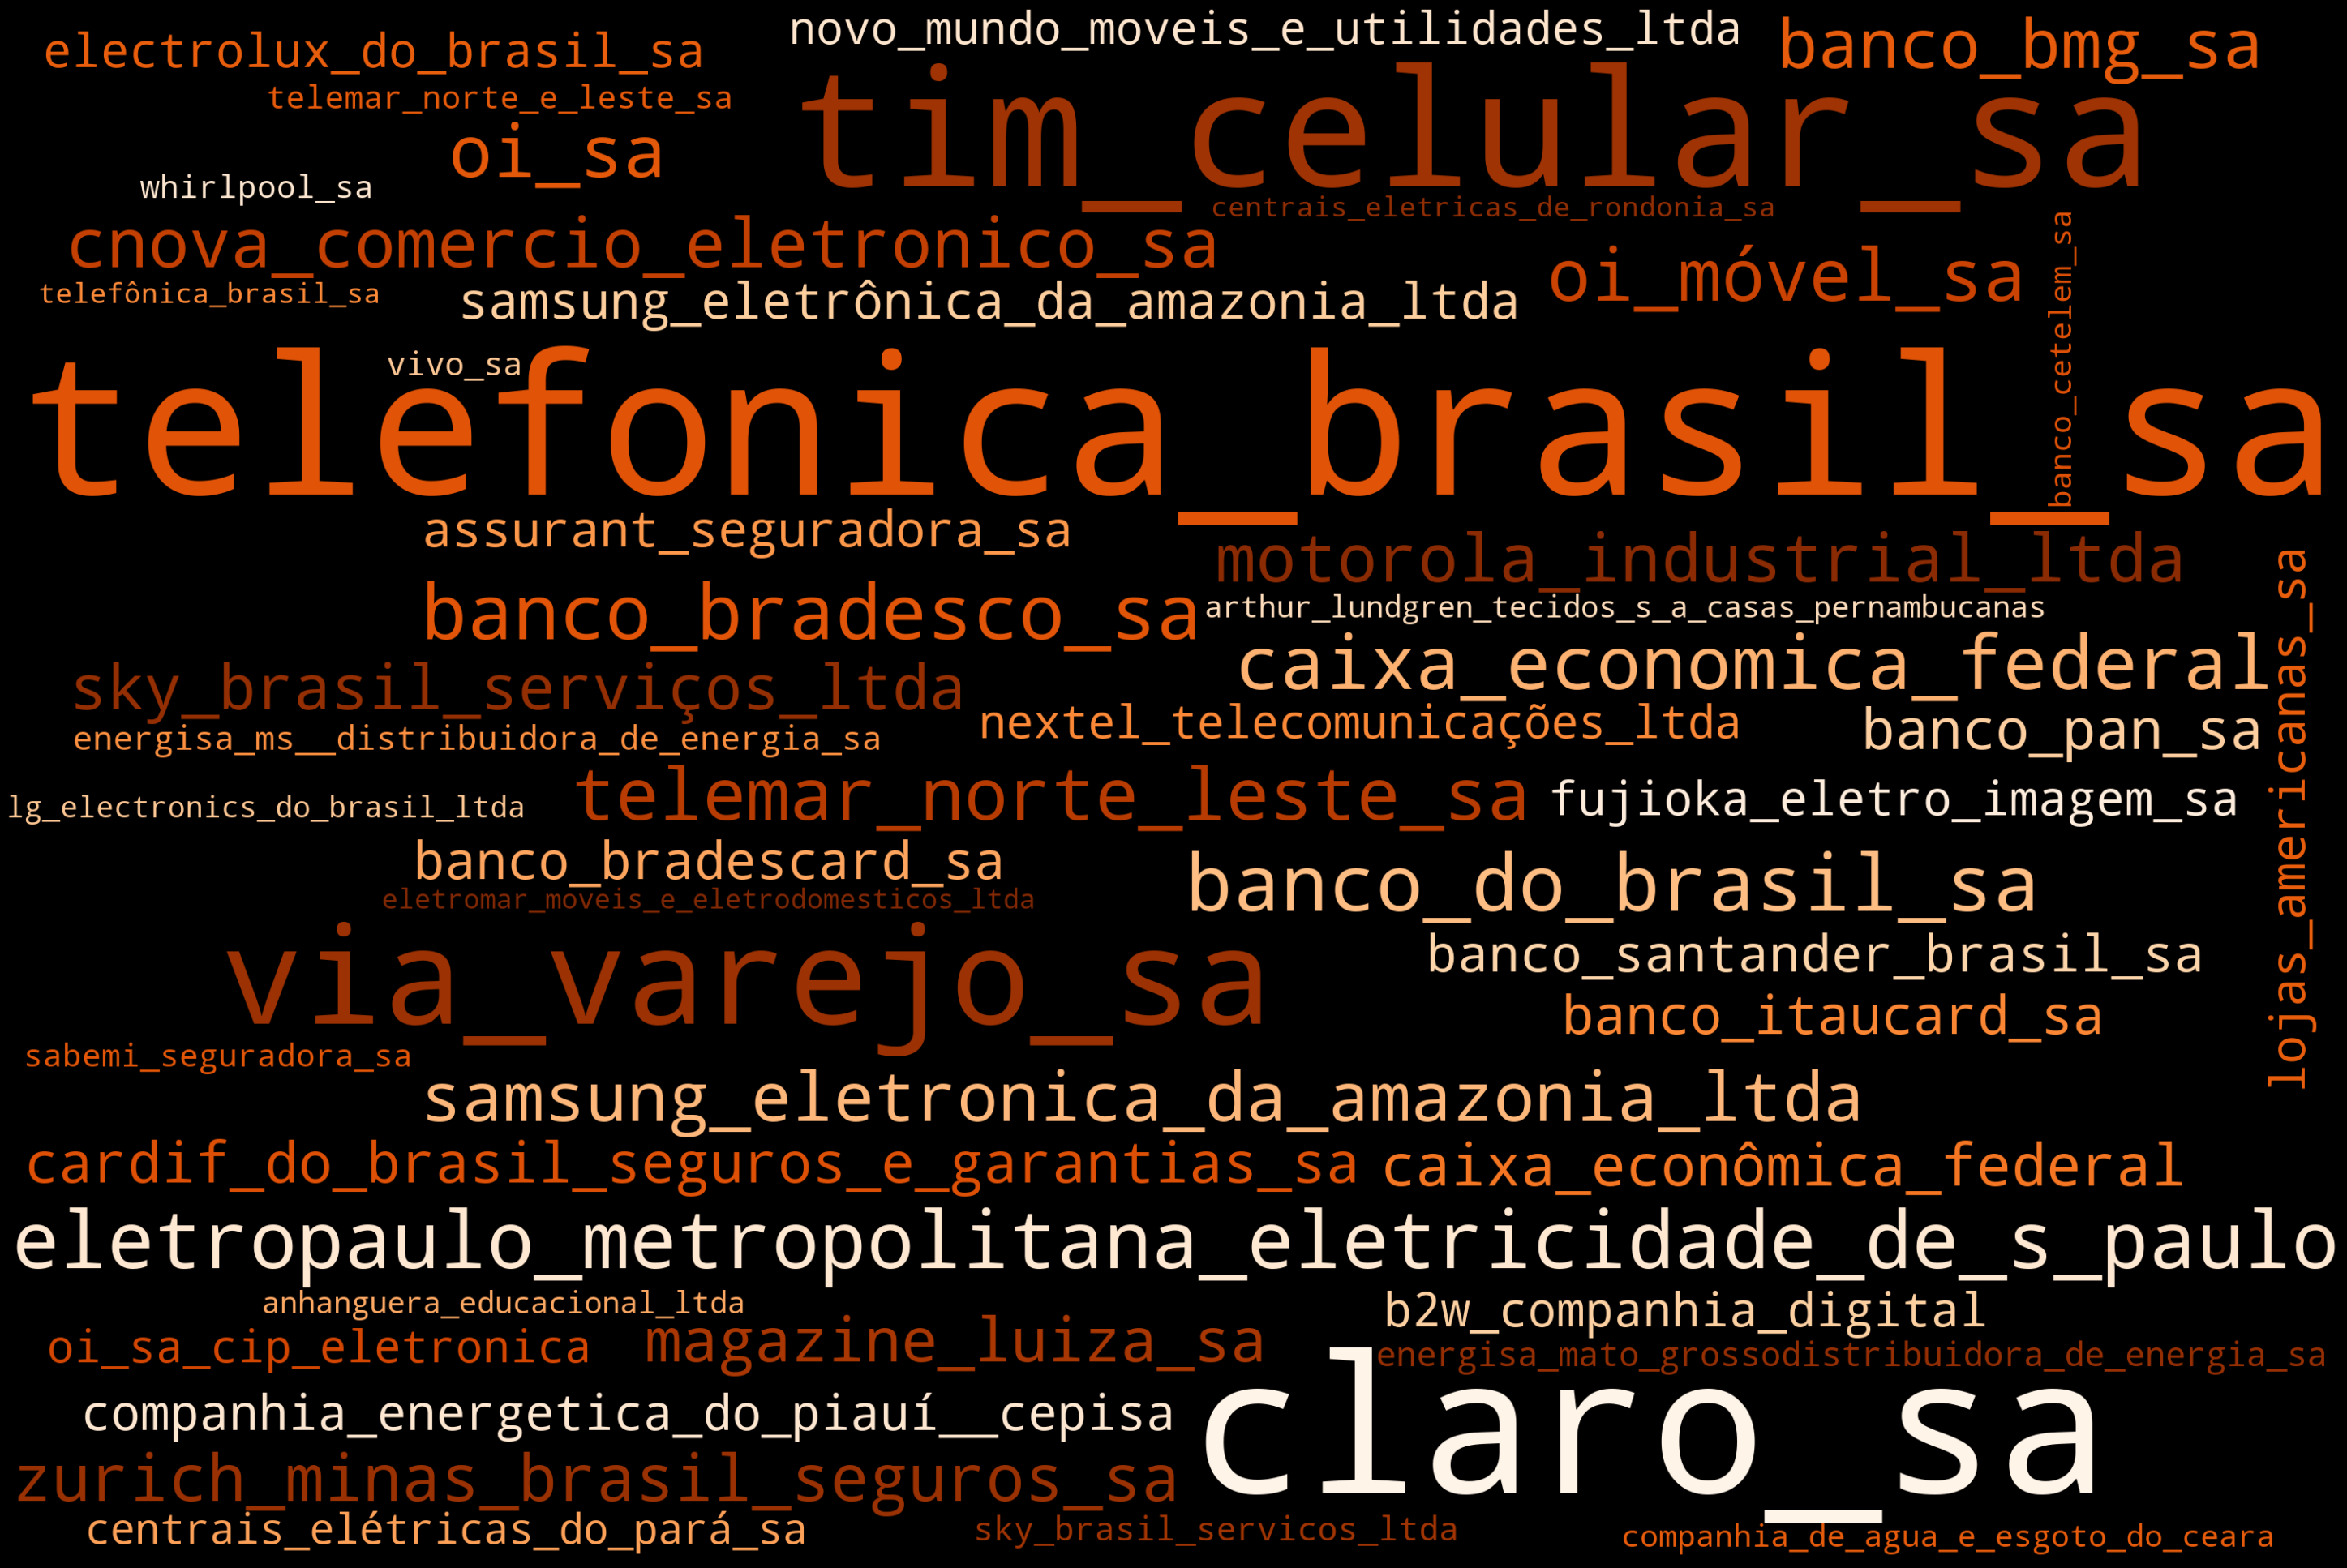

In [47]:
# Chamando as funções para a Empresa
empresa = 'empresa'
string_empresas = TrataDados(empresa)
WordClod(string_empresas)

#Estado

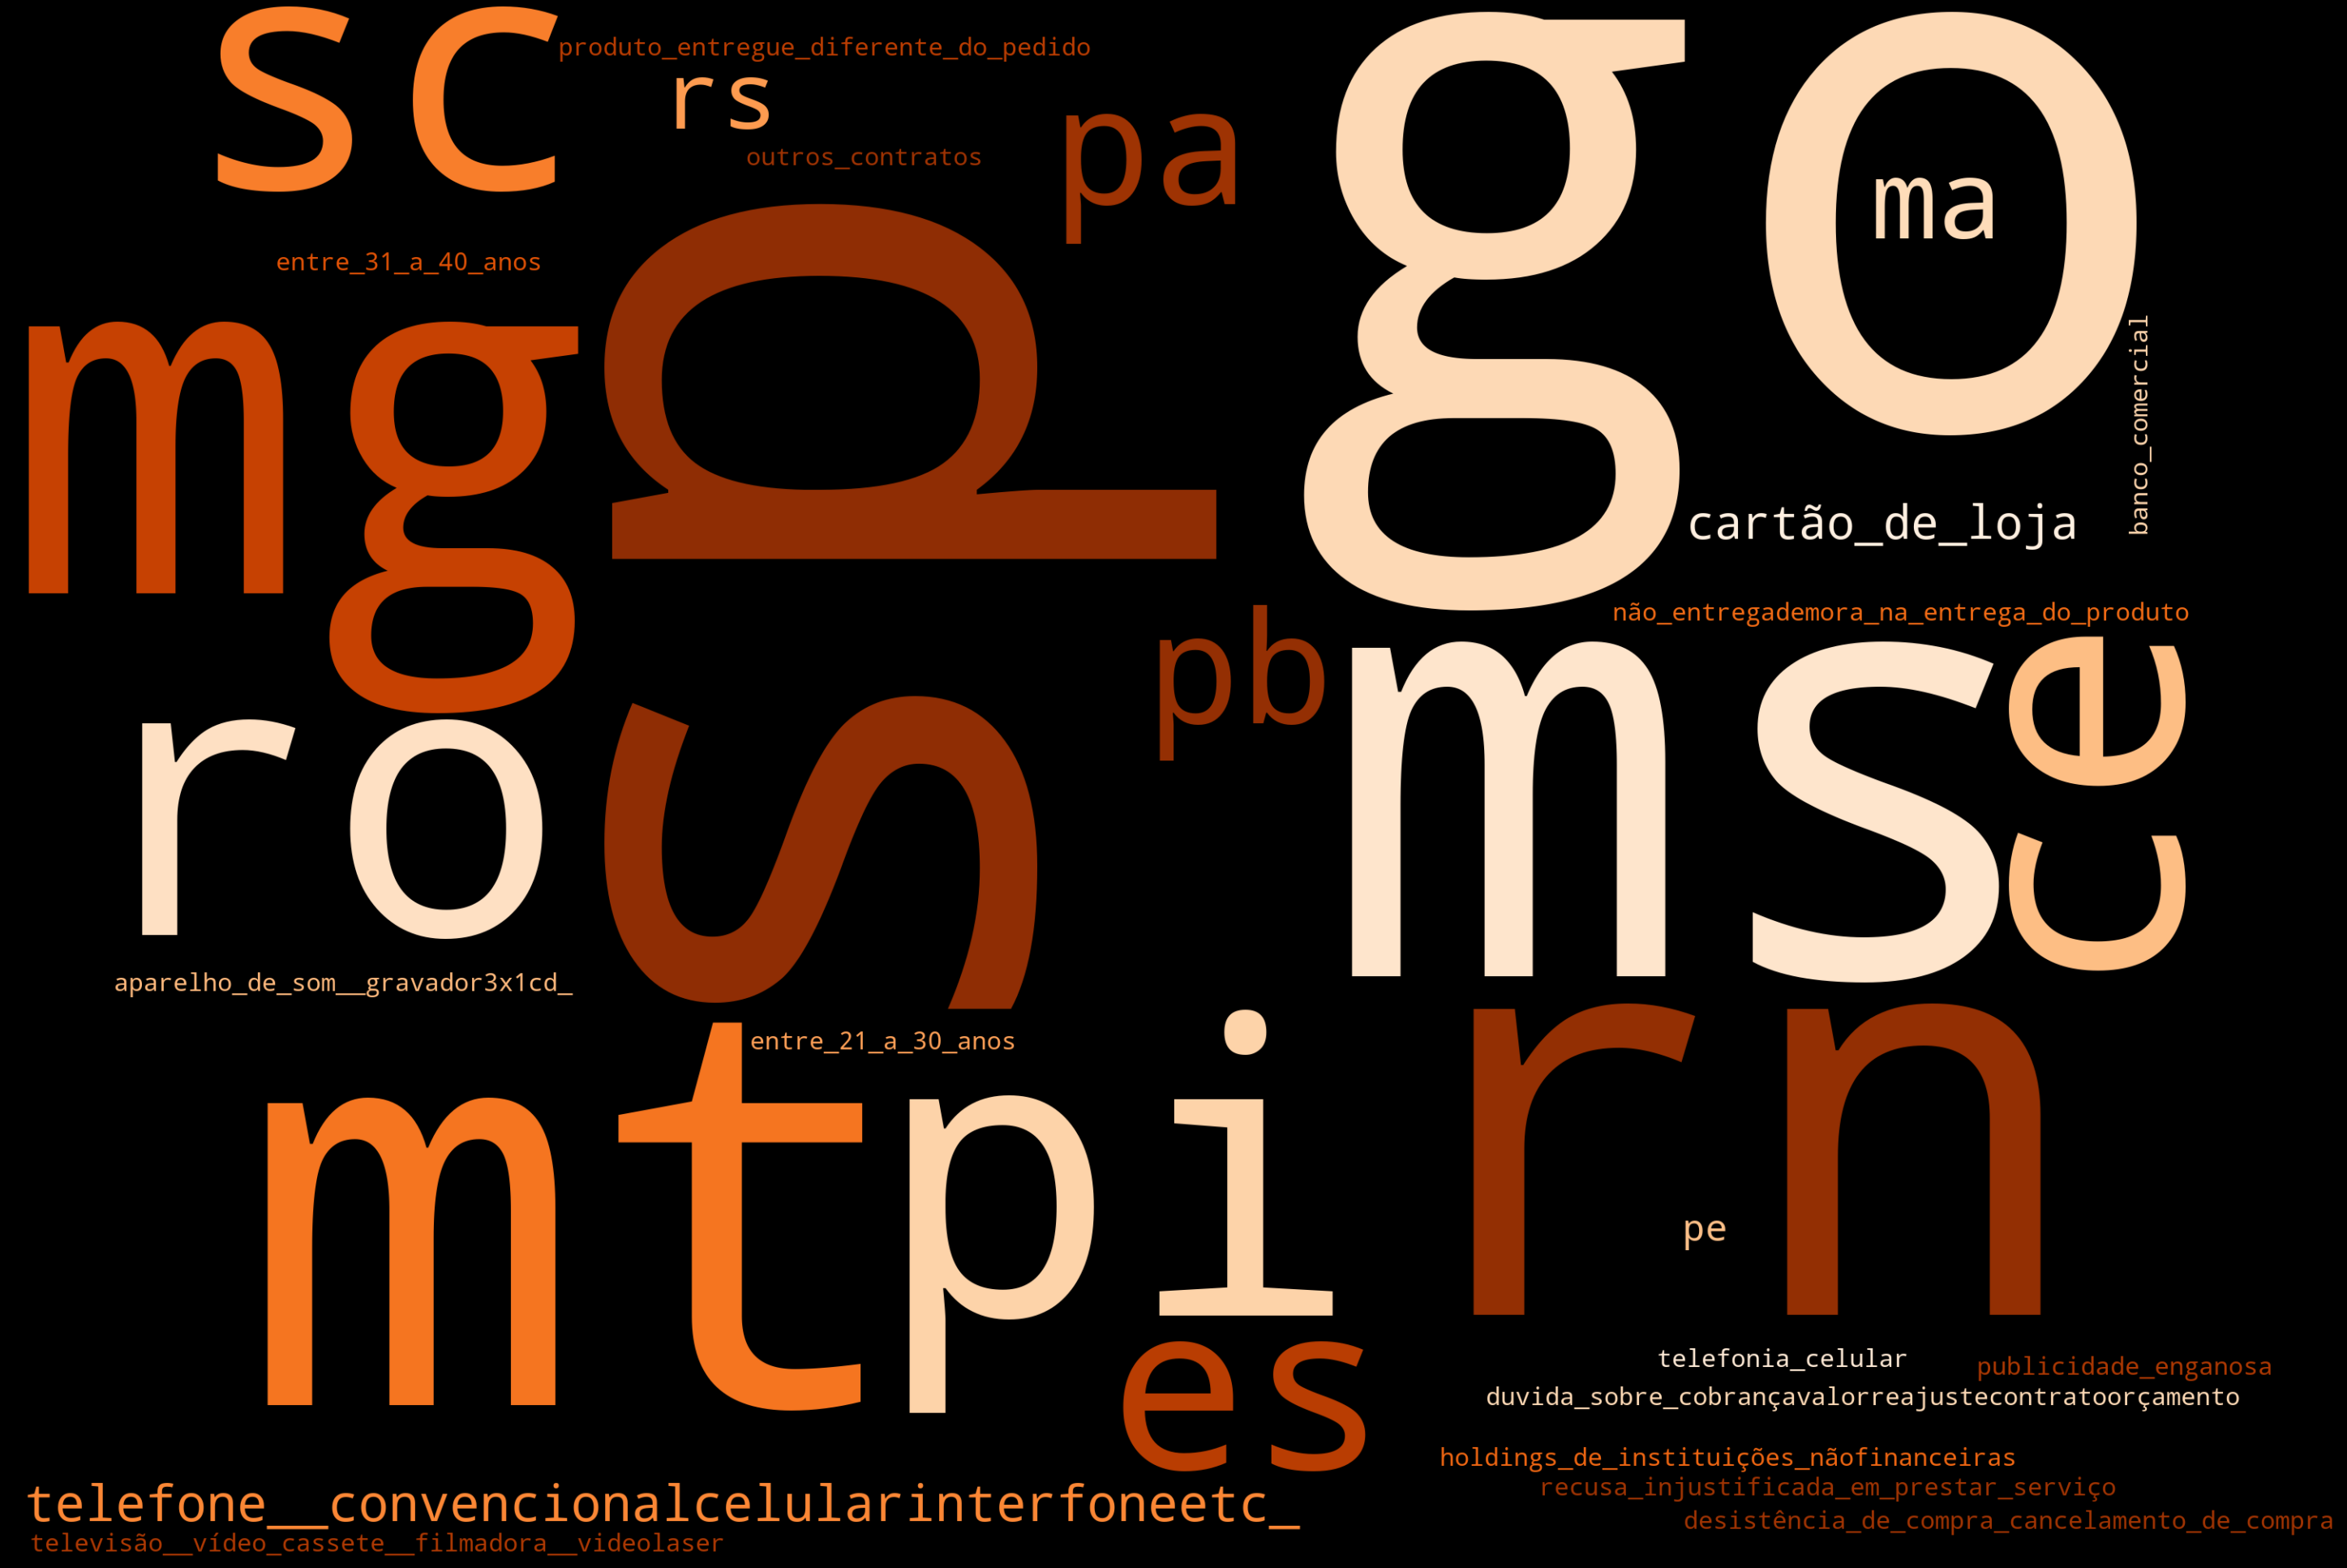

In [48]:
# Chamando as funções para o Estado
estado = 'estado'
string_estado = TrataDados(estado)
WordClod(string_estado)

#Serviço

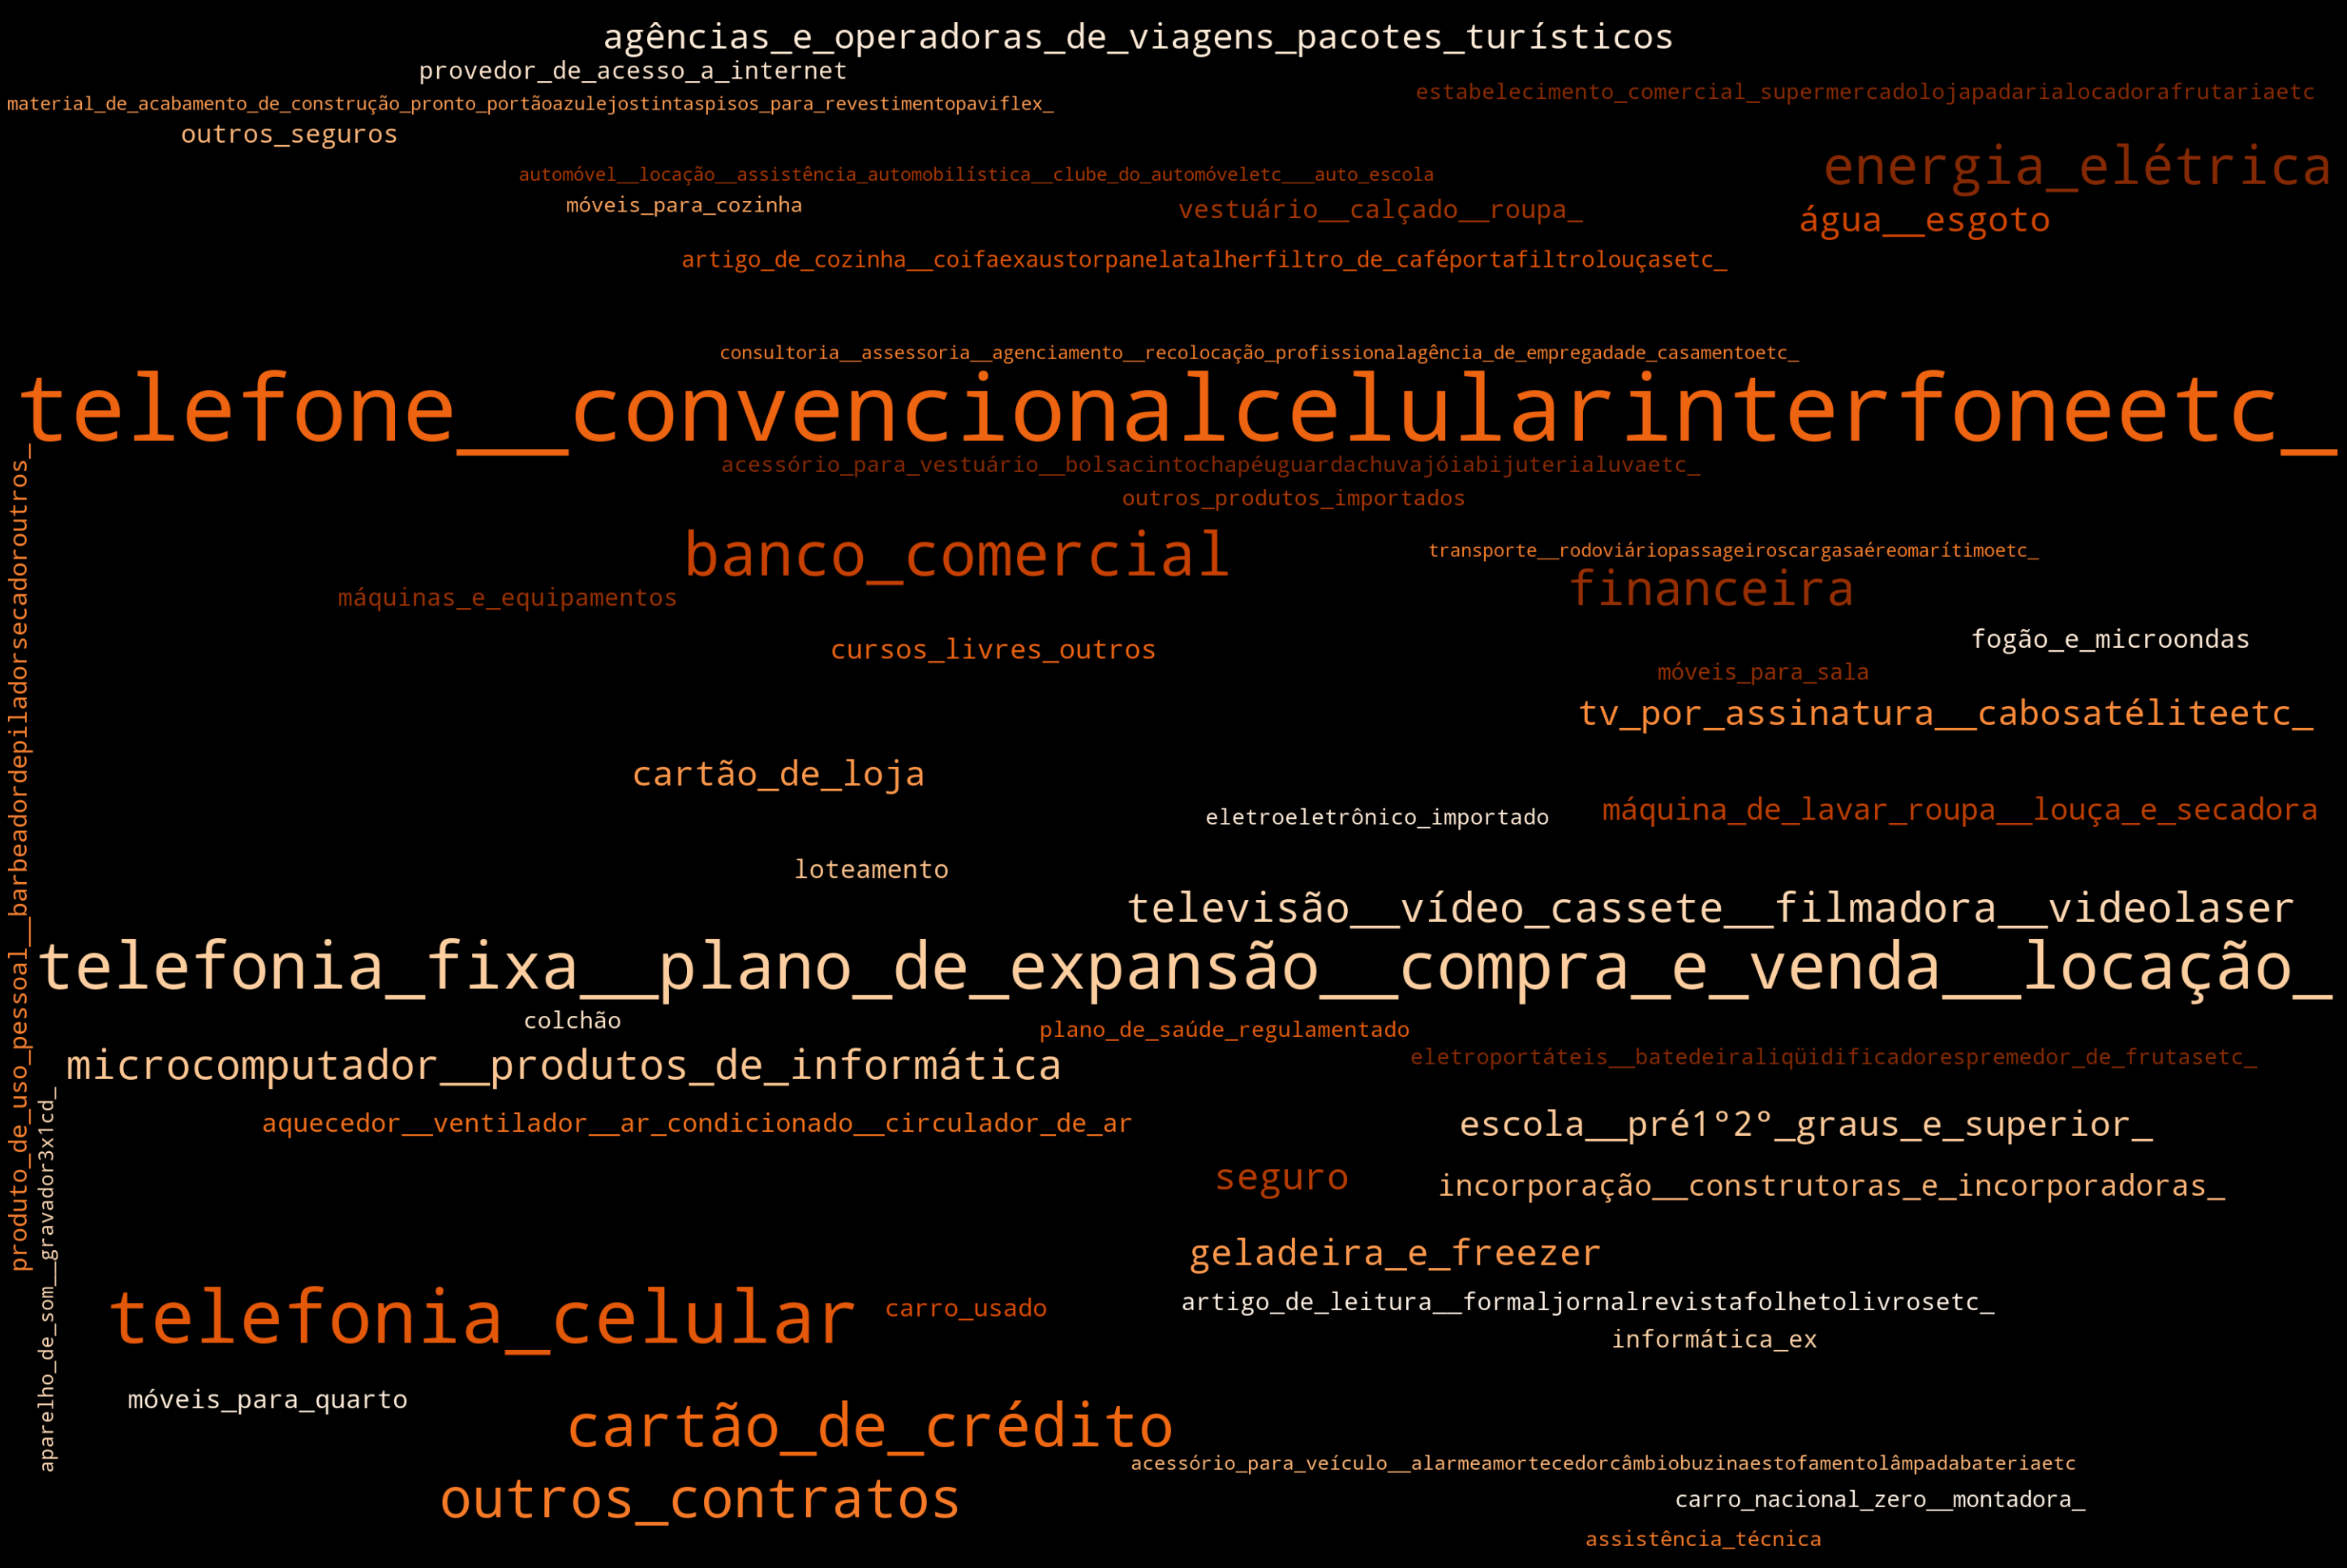

In [49]:
# Chamando as funções para a Serviço
servico = 'serviço'
string_servico = TrataDados(servico)
WordClod(string_servico)